# Example: pivot tools for standard form linear-optimization problem $P$
## [Jon Lee](https://sites.google.com/site/jonleewebpage/home), 11/21/2020

For standard-form problems
\begin{align*}\tag{P}
z := \min~& c'x\\
&Ax   = b~;\\
&x \geq \mathbf{0}~.
\end{align*}

Notes:

* Can work with $\epsilon$ perturbed right-hand side

References:

* Jon Lee, "A First Course in Linear Optimization", Fourth Edition (Version 4.05), Reex Press, 2013-22.

MIT License

Copyright (c) 2020 Jon Lee

Permission is hereby granted, free of charge, to any person obtaining a copy 
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
%reset -f

In [2]:
%run ./pivot_tools.ipynb

pivot_tools loaded: pivot_perturb, pivot_algebra, N, pivot_ratios, pivot_swap, pivot_plot, pure_gomory, mixed_gomory, dual_plot


In [3]:
A = sym.Matrix(([1, 2, 1, 0, 0, 0], 
                [3, 1, 0, 1, 0, 0], 
                [sym.Rational(3,2), sym.Rational(3,2), 0, 0, 1, 0], 
                [0, 1, 0, 0, 0, 1]))
m = A.shape[0]
n = A. shape[1]
c = sym.Matrix([6, 7, -2, 0, 4, sym.Rational(9,2)])
b = sym.Matrix([7, 9, 6, sym.Rational(33,10)])
beta = [0,1,3,5]
eta = list(set(list(range(n)))-set(beta))
A_beta = copy.copy(A[:,beta])
A_eta = copy.copy(A[:,eta])
c_beta = copy.copy(c[beta,0])
c_eta  = copy.copy(c[eta,0])
Perturb=False ### do NOT change this!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! You can perturb later

In [4]:
A

⎡ 1    2   1  0  0  0⎤
⎢                    ⎥
⎢ 3    1   0  1  0  0⎥
⎢                    ⎥
⎢3/2  3/2  0  0  1  0⎥
⎢                    ⎥
⎣ 0    1   0  0  0  1⎦

In [5]:
c

⎡ 6 ⎤
⎢   ⎥
⎢ 7 ⎥
⎢   ⎥
⎢-2 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 4 ⎥
⎢   ⎥
⎣9/2⎦

In [6]:
#pivot_perturb()    # uncomment to perturb the right-hand side

In [7]:
b

⎡7 ⎤
⎢  ⎥
⎢9 ⎥
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢33⎥
⎢──⎥
⎣10⎦

In [8]:
beta

[0, 1, 3, 5]

In [9]:
eta

[2, 4]

In [10]:
A_beta

⎡ 1    2   0  0⎤
⎢              ⎥
⎢ 3    1   1  0⎥
⎢              ⎥
⎢3/2  3/2  0  0⎥
⎢              ⎥
⎣ 0    1   0  1⎦

In [11]:
A_eta

⎡1  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢0  1⎥
⎢    ⎥
⎣0  0⎦

In [12]:
pivot_algebra()

pivot_algebra() done


In [13]:
objval

567
───
 20

In [14]:
xbar_beta

⎡ 1  ⎤
⎢    ⎥
⎢ 3  ⎥
⎢    ⎥
⎢ 3  ⎥
⎢    ⎥
⎣3/10⎦

In [15]:
cbar_eta

⎡3/2 ⎤
⎢    ⎥
⎣-7/3⎦

In [16]:
pivot_ratios(1)

⎡3/4 ⎤
⎢    ⎥
⎢ ∞  ⎥
⎢    ⎥
⎢ ∞  ⎥
⎢    ⎥
⎣9/20⎦

\bar{x}+\lambda \bar{z} :

⎡    4⋅λ ⎤
⎢1 - ─── ⎥
⎢     3  ⎥
⎢        ⎥
⎢2⋅λ     ⎥
⎢─── + 3 ⎥
⎢ 3      ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎢10⋅λ    ⎥
⎢──── + 3⎥
⎢ 3      ⎥
⎢        ⎥
⎢   λ    ⎥
⎢        ⎥
⎢3    2⋅λ⎥
⎢── - ───⎥
⎣10    3 ⎦

In [17]:
c.dot(zbar) # agrees with cbar_eta(1)

-7/3

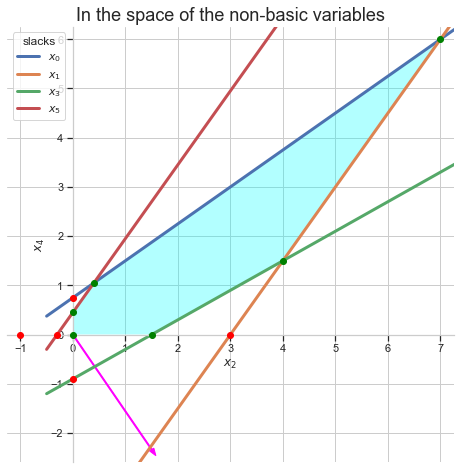

In [18]:
pivot_plot()

In [19]:
pivot_swap(1,3)

<IPython.core.display.Latex object>

eta: [2, 5]
beta: [0, 1, 3, 4]
*** MUST APPLY pivot_algebra()! ***


In [20]:
pivot_algebra()

pivot_algebra() done


In [21]:
sym.N(objval)

27.3000000000000

In [22]:
xbar_beta

⎡2/5 ⎤
⎢    ⎥
⎢ 33 ⎥
⎢ ── ⎥
⎢ 10 ⎥
⎢    ⎥
⎢9/2 ⎥
⎢    ⎥
⎣9/20⎦

In [23]:
cbar_eta

⎡-2 ⎤
⎢   ⎥
⎣7/2⎦

In [24]:
pivot_ratios(0)

⎡2/5⎤
⎢   ⎥
⎢ ∞ ⎥
⎢   ⎥
⎢ ∞ ⎥
⎢   ⎥
⎣ ∞ ⎦

\bar{x}+\lambda \bar{z} :

⎡ 2/5 - λ ⎤
⎢         ⎥
⎢   33    ⎥
⎢   ──    ⎥
⎢   10    ⎥
⎢         ⎥
⎢    λ    ⎥
⎢         ⎥
⎢3⋅λ + 9/2⎥
⎢         ⎥
⎢3⋅λ   9  ⎥
⎢─── + ── ⎥
⎢ 2    20 ⎥
⎢         ⎥
⎣    0    ⎦

In [25]:
c.dot(zbar) # agrees with cbar_eta(0)

-2

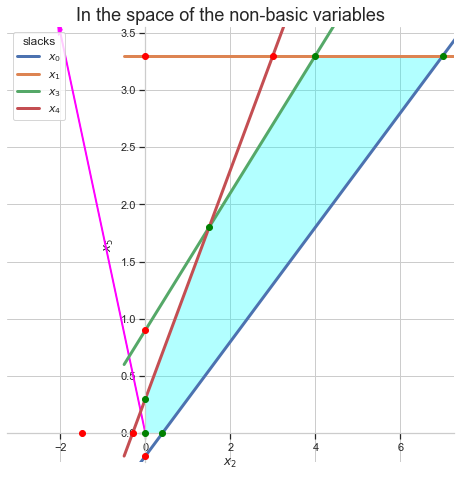

In [26]:
pivot_plot()

In [27]:
pivot_swap(0,0)

<IPython.core.display.Latex object>

eta: [0, 5]
beta: [2, 1, 3, 4]
*** MUST APPLY pivot_algebra()! ***


In [28]:
pivot_algebra()

pivot_algebra() done


In [29]:
sym.N(objval)

26.5000000000000

In [30]:
xbar_beta

⎡2/5⎤
⎢   ⎥
⎢33 ⎥
⎢── ⎥
⎢10 ⎥
⎢   ⎥
⎢57 ⎥
⎢── ⎥
⎢10 ⎥
⎢   ⎥
⎢21 ⎥
⎢── ⎥
⎣20 ⎦

In [31]:
cbar_eta

⎡ 2  ⎤
⎢    ⎥
⎣-1/2⎦

In [32]:
pivot_ratios(1)

⎡∞ ⎤
⎢  ⎥
⎢33⎥
⎢──⎥
⎢10⎥
⎢  ⎥
⎢∞ ⎥
⎢  ⎥
⎣∞ ⎦

\bar{x}+\lambda \bar{z} :

⎡    0    ⎤
⎢         ⎥
⎢ 33      ⎥
⎢ ── - λ  ⎥
⎢ 10      ⎥
⎢         ⎥
⎢2⋅λ + 2/5⎥
⎢         ⎥
⎢     57  ⎥
⎢ λ + ──  ⎥
⎢     10  ⎥
⎢         ⎥
⎢3⋅λ   21 ⎥
⎢─── + ── ⎥
⎢ 2    20 ⎥
⎢         ⎥
⎣    λ    ⎦

In [33]:
c.dot(zbar) # agrees with cbar_eta(1)

-1/2

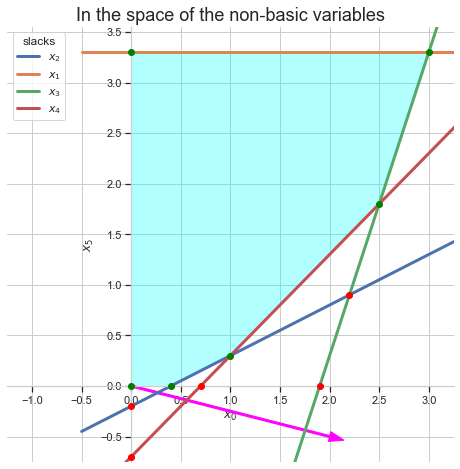

In [34]:
pivot_plot()

In [35]:
pivot_swap(1,1)

<IPython.core.display.Latex object>

eta: [0, 1]
beta: [2, 5, 3, 4]
*** MUST APPLY pivot_algebra()! ***


In [36]:
pivot_algebra()

pivot_algebra() done


In [37]:
sym.N(objval)

24.8500000000000

In [38]:
xbar_beta

⎡7 ⎤
⎢  ⎥
⎢33⎥
⎢──⎥
⎢10⎥
⎢  ⎥
⎢9 ⎥
⎢  ⎥
⎣6 ⎦

In [39]:
cbar_eta

⎡ 2 ⎤
⎢   ⎥
⎣1/2⎦

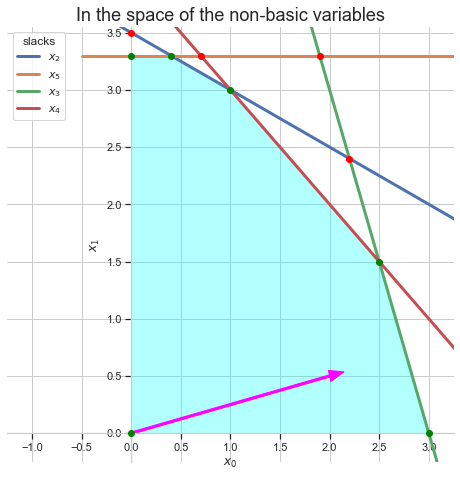

In [40]:
pivot_plot()

In [41]:
xbar

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢7 ⎥
⎢  ⎥
⎢9 ⎥
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢33⎥
⎢──⎥
⎣10⎦

In [42]:
objval

497
───
 20

In [43]:
c.dot(xbar) # reality check 

497
───
 20

In [44]:
c_beta.dot(xbar_beta) # reality check 

497
───
 20

In [45]:
ybar.dot(b) # reality check 

497
───
 20

In [46]:
sym.transpose(c)-sym.transpose(ybar)*A  # reality check 

[2  1/2  0  0  0  0]

In [47]:
b-A*xbar # reality check 

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦